# Statistics 447b Project

In [1]:
library(tidyverse)
library(ggmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [2]:
DatasetPath <- "./train.csv"

In [3]:
training <- read.csv(DatasetPath)

In [4]:
# remove near zer values for "TimeFromFirstStop"
training <- training %>% filter(TimeFromFirstStop_p50 > 100)
head(training)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,⋯,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1922793,4,33.81767,-84.36696,Piedmont Road Northeast,Dan Lane Northeast,N,W,16,0,⋯,91,102,108,120,58.2,72.7,79.0,79.0,86.7,Atlanta
2,1923222,4,33.81767,-84.36696,Garson Drive,Piedmont Road Northeast,W,S,17,0,⋯,77,122,128,168,0.0,75.6,104.3,118.0,127.0,Atlanta
3,1923451,4,33.81767,-84.36696,Piedmont Road Northeast,Dan Lane Northeast,N,W,17,0,⋯,81,103,103,127,0.0,62.8,81.8,82.2,140.6,Atlanta
4,1923683,4,33.81767,-84.36696,Garson Drive,Piedmont Road Northeast,SW,S,17,0,⋯,108,108,151,203,87.8,92.9,92.9,95.9,156.2,Atlanta
5,1923685,4,33.81767,-84.36696,Piedmont Road Northeast,Dan Lane Northeast,N,W,17,0,⋯,99,110,119,125,53.0,65.1,70.7,93.4,108.1,Atlanta
6,1923851,4,33.81767,-84.36696,Garson Drive,Piedmont Road Northeast,SW,S,10,0,⋯,98,101,106,117,71.4,79.1,83.0,83.4,87.5,Atlanta


In [5]:
boundingBox <- function (dataset) {
    c(
        left = min(dataset$Longitude), 
        bottom = min(dataset$Latitude), 
        right = max(dataset$Longitude), 
        top = max(dataset$Latitude)
    )
}

In [6]:
generate_map <- function (dataset) {
    u <- unique(dataset$City)
    for (city in u) {
        ccity_dataset <- dataset %>% filter(City == city)
        cbox <- boundingBox(ccity_dataset)
        print(
            get_stamenmap(cbox, zoom = 10, maptype = "toner-lite") %>% ggmap() +
            geom_point(data = dataset, mapping = aes(
                x = Longitude, 
                y = Latitude,
                col = TimeFromFirstStop_p50,
                size = 5
            )) + 
            scale_color_distiller(palette = "YlOrRd", direction = 1)
        )
    }
}

Source : http://tile.stamen.com/toner-lite/10/271/409.png

Source : http://tile.stamen.com/toner-lite/10/272/409.png

Source : http://tile.stamen.com/toner-lite/10/271/410.png

Source : http://tile.stamen.com/toner-lite/10/272/410.png

Warning message:
“Removed 7111 rows containing missing values (geom_point).”
Source : http://tile.stamen.com/toner-lite/10/309/378.png

Source : http://tile.stamen.com/toner-lite/10/309/379.png

Warning message:
“Removed 7905 rows containing missing values (geom_point).”
Source : http://tile.stamen.com/toner-lite/10/262/380.png

Source : http://tile.stamen.com/toner-lite/10/262/381.png



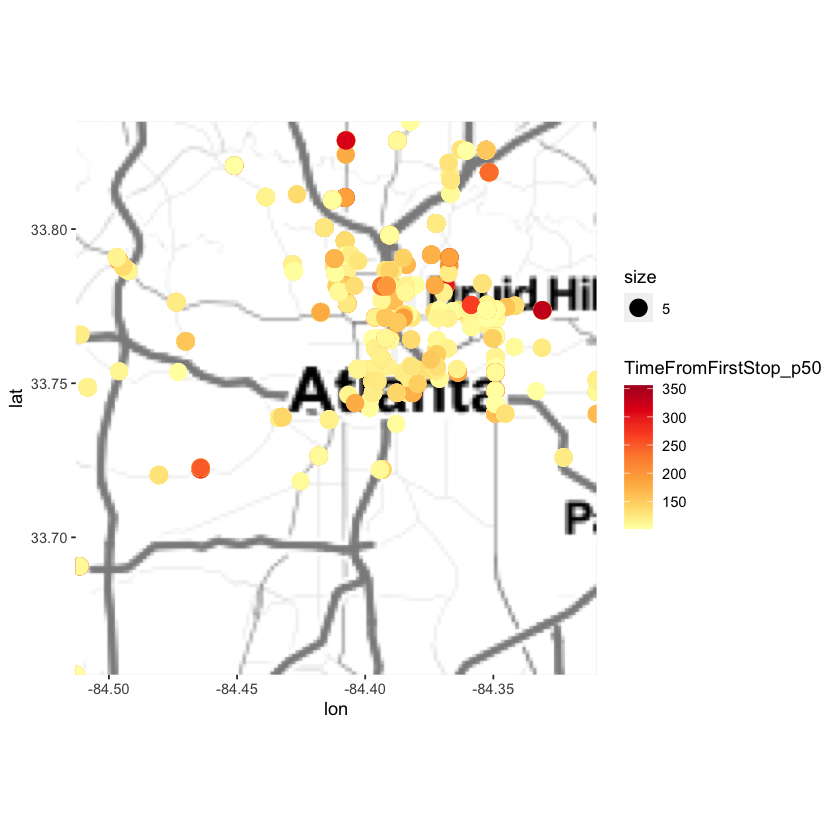

Warning message:
“Removed 8493 rows containing missing values (geom_point).”
Source : http://tile.stamen.com/toner-lite/10/297/387.png

Source : http://tile.stamen.com/toner-lite/10/298/387.png

Source : http://tile.stamen.com/toner-lite/10/297/388.png

Source : http://tile.stamen.com/toner-lite/10/298/388.png



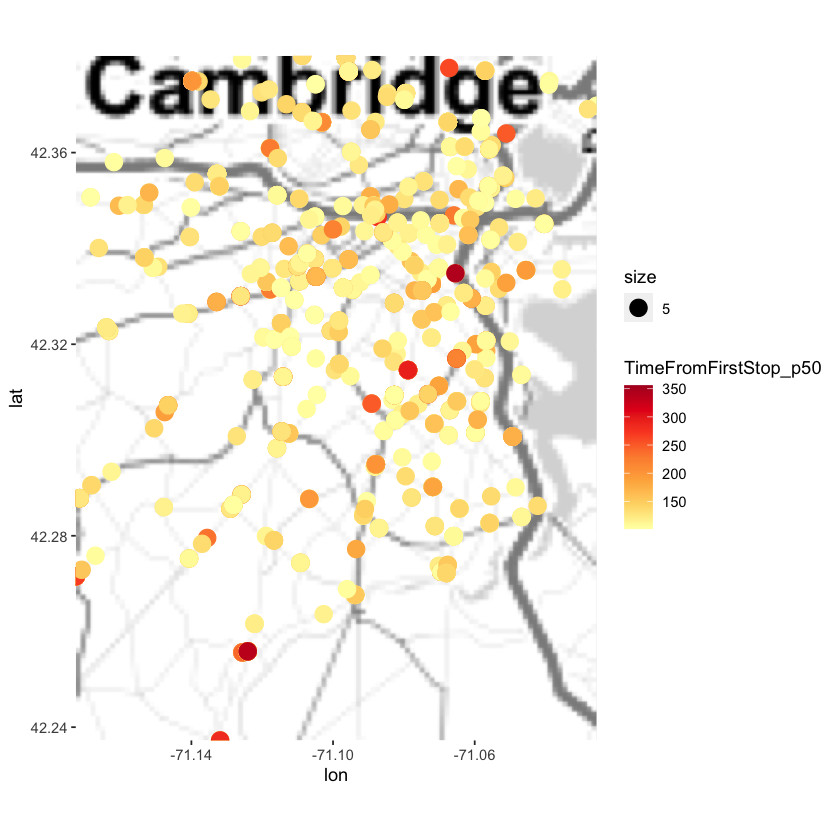

Warning message:
“Removed 5198 rows containing missing values (geom_point).”


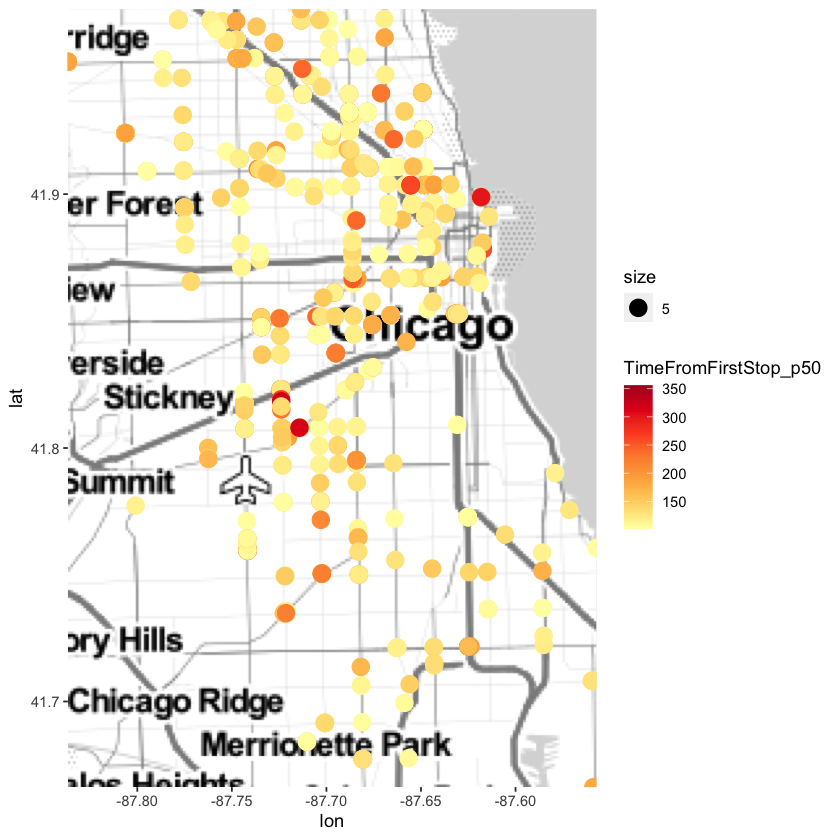

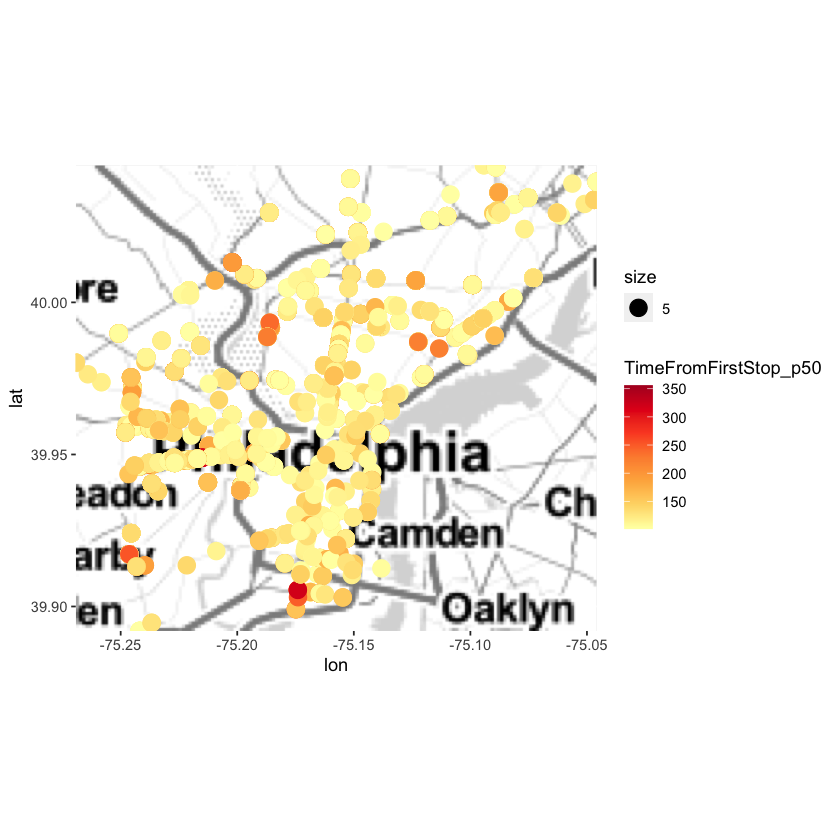

In [7]:
generate_map(training)

In [1]:
# remove missing values

In [2]:
# transform variables

In [3]:
# pairwise scatter plots

In [4]:
# boxplots

In [6]:
# correlation table

# co - lineararity

In [ ]:
# Left turn, right turn, straight through, feature engineering column...